In [1]:
import pandas as pd
#https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [6]:
# Lendo o dataframe
df = pd.read_csv("https://raw.githubusercontent.com/JackyP/testing/master/datasets/nycflights.csv", index_col=0)
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


- year,month,day: Date of departure
- dep_time,arr_time: Departure and arrival times, format HMM or HHMM
- dep_delay,arr_delay: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
- hour,minute : Time of departure broken in to hour and minutes
- carrier: Two letter carrier abbreviation
- tailnum: Plane tail number
- flight: Flight number
- origin,dest: Origin and destination.
- air_time: Amount of time spent in the air
- distance: Distance flown

### Explorando as características do dataframe

In [7]:
df.shape

(336776, 16)

In [8]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [9]:
df.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 1 to 336776
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       336776 non-null  int64  
 1   month      336776 non-null  int64  
 2   day        336776 non-null  int64  
 3   dep_time   328521 non-null  float64
 4   dep_delay  328521 non-null  float64
 5   arr_time   328063 non-null  float64
 6   arr_delay  327346 non-null  float64
 7   carrier    336776 non-null  object 
 8   tailnum    334264 non-null  object 
 9   flight     336776 non-null  int64  
 10  origin     336776 non-null  object 
 11  dest       336776 non-null  object 
 12  air_time   327346 non-null  float64
 13  distance   336776 non-null  int64  
 14  hour       328521 non-null  float64
 15  minute     328521 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 43.7+ MB


In [12]:
print(df["year"].unique(), df["year"].nunique())

[2013] 1


In [17]:
print(list(df.select_dtypes(include="object")))
df["flight"] = df["flight"].astype("str")
print(list(df.select_dtypes(include="object")))

['carrier', 'tailnum', 'origin', 'dest']
['carrier', 'tailnum', 'flight', 'origin', 'dest']


In [18]:
for col in list(df.select_dtypes(include="object")) + ["year", "month"]:
    print(f"{col}: {df[col].nunique()} - {df[col].unique()}")

carrier: 16 - ['UA' 'AA' 'B6' 'DL' 'EV' 'MQ' 'US' 'WN' 'VX' 'FL' 'AS' '9E' 'F9' 'HA'
 'YV' 'OO']
tailnum: 4043 - ['N14228' 'N24211' 'N619AA' ... 'N776SK' 'N785SK' 'N557AS']
flight: 3844 - ['1545' '1714' '1141' ... '3583' '3857' '3539']
origin: 3 - ['EWR' 'LGA' 'JFK']
dest: 105 - ['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']
year: 1 - [2013]
month: 12 - [ 1 10 11 12  2  3  4  5  6  7  8  9]


### Slice & Filtros
Quando o objetivo é selecionar uma parte do dataframe através de colunas ou linhas, sem nenhum tipo de condicional diremos ser uma operação de *slice*, caso contrário de *filtro*
As formas mais recomendadas para este cenário são o loc e iloc
- loc() → labels das linhas e colunas
- iloc() → index das linhas e colunas

Slices

In [21]:
df.loc[:,"distance"]

1         1400
2         1416
3         1089
4         1576
5          762
          ... 
336772     213
336773     198
336774     764
336775     419
336776     431
Name: distance, Length: 336776, dtype: int64

In [24]:
df.loc[1]

year           2013
month             1
day               1
dep_time      517.0
dep_delay       2.0
arr_time      830.0
arr_delay      11.0
carrier          UA
tailnum      N14228
flight         1545
origin          EWR
dest            IAH
air_time      227.0
distance       1400
hour            5.0
minute         17.0
Name: 1, dtype: object

In [23]:
df.iloc[0]

year           2013
month             1
day               1
dep_time      517.0
dep_delay       2.0
arr_time      830.0
arr_delay      11.0
carrier          UA
tailnum      N14228
flight         1545
origin          EWR
dest            IAH
air_time      227.0
distance       1400
hour            5.0
minute         17.0
Name: 1, dtype: object

In [26]:
df.iloc[: ,[1, 3, 6]]

,month,dep_time,arr_delay
1,1,517.0,11.0
2,1,533.0,20.0
3,1,542.0,33.0
4,1,544.0,-18.0
5,1,554.0,-25.0
...,...,...,...
336772,9,NaN,NaN
336773,9,NaN,NaN
336774,9,NaN,NaN
336775,9,NaN,NaN


Filtros

In [27]:
# condicionais com loc
df.loc[df["origin"] == "JFK"]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
11,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0
12,2013,1,1,558.0,-2.0,853.0,-3.0,B6,N657JB,71,JFK,TPA,158.0,1005,5.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0
336770,2013,9,30,2349.0,-10.0,325.0,-25.0,B6,N516JB,745,JFK,PSE,196.0,1617,23.0,49.0


In [28]:
# condicionais sem loc
df[df["origin"] == "JFK"]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
11,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0
12,2013,1,1,558.0,-2.0,853.0,-3.0,B6,N657JB,71,JFK,TPA,158.0,1005,5.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0
336770,2013,9,30,2349.0,-10.0,325.0,-25.0,B6,N516JB,745,JFK,PSE,196.0,1617,23.0,49.0


In [29]:
# múltiplas condicionais
df.loc[(df["origin"]=="JFK") & (df["carrier"]=="B6")]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
11,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0
12,2013,1,1,558.0,-2.0,853.0,-3.0,B6,N657JB,71,JFK,TPA,158.0,1005,5.0,58.0
16,2013,1,1,559.0,0.0,702.0,-4.0,B6,N708JB,1806,JFK,BOS,44.0,187,5.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336766,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209,22.0,40.0
336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0


In [31]:
# condicionais com iloc
df.loc[df["year"] == 2013].iloc[:,2:]

,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
2,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
3,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
5,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336773,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336774,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336775,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN


In [32]:
# where
df.where(df["distance"]> 1000)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013.0,1.0,1.0,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400.0,5.0,17.0
2,2013.0,1.0,1.0,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416.0,5.0,33.0
3,2013.0,1.0,1.0,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089.0,5.0,42.0
4,2013.0,1.0,1.0,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576.0,5.0,44.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#np where
import numpy as np

np.where(df["distance"] > 1000)

(array([     0,      1,      2, ..., 336754, 336762, 336769], dtype=int64),)

In [35]:
df[df["origin"].isin(["JFK"])]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
11,2013,1,1,558.0,-2.0,849.0,-2.0,B6,N793JB,49,JFK,PBI,149.0,1028,5.0,58.0
12,2013,1,1,558.0,-2.0,853.0,-3.0,B6,N657JB,71,JFK,TPA,158.0,1005,5.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0
336770,2013,9,30,2349.0,-10.0,325.0,-25.0,B6,N516JB,745,JFK,PSE,196.0,1617,23.0,49.0


### Operações

Operações em colunas **sem** condicionais de observação (linha)

In [39]:
#df["hour"] - 3
df["air_time"]/60

1         3.783333
2         3.783333
3         2.666667
4         3.050000
5         1.933333
            ...   
336772         NaN
336773         NaN
336774         NaN
336775         NaN
336776         NaN
Name: air_time, Length: 336776, dtype: float64

In [40]:
df["rota"] = df["origin"] + "-" + df["dest"]
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,rota
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,EWR-IAH
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,LGA-IAH
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,JFK-MIA
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,JFK-BQN
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,LGA-ATL


In [43]:
len(df["rota"].unique())

224

In [41]:
print(
    df["arr_delay"].max(),
    df["arr_delay"].min(),
    df["arr_delay"].mean()
    )

1272.0 -86.0 6.89537675731489


In [42]:
df.describe()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,328521.000000,328063.000000,327346.000000,327346.000000,336776.000000,328521.000000,328521.000000
mean,2013.0,6.548510,15.710787,1349.109947,12.639070,1502.054999,6.895377,150.686460,1039.912604,13.173544,31.755501
std,0.0,3.414457,8.768607,488.281791,40.210061,533.264132,44.633292,93.688305,733.233033,4.894426,18.230997
min,2013.0,1.000000,1.000000,1.000000,-43.000000,1.000000,-86.000000,20.000000,17.000000,0.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,-5.000000,1104.000000,-17.000000,82.000000,502.000000,9.000000,16.000000
50%,2013.0,7.000000,16.000000,1401.000000,-2.000000,1535.000000,-5.000000,129.000000,872.000000,14.000000,31.000000
75%,2013.0,10.000000,23.000000,1744.000000,11.000000,1940.000000,14.000000,192.000000,1389.000000,17.000000,49.000000
max,2013.0,12.000000,31.000000,2400.000000,1301.000000,2400.000000,1272.000000,695.000000,4983.000000,24.000000,59.000000


Operações em colunas **com** condicionais de observação (linha)

In [44]:
np.where(df["month"] == 1, df["hour"]-4, df["hour"]-3)

array([ 1.,  1.,  1., ..., nan, nan, nan])

In [46]:
df.apply(lambda x: x["hour"] - 4 if x["month"] == 1 else x["hour"] - 1, axis=1)

1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
         ... 
336772    NaN
336773    NaN
336774    NaN
336775    NaN
336776    NaN
Length: 336776, dtype: float64

In [47]:
def hora_verao(df, mes):
    if df["month"] == mes:
        return df["hour"] - 4
    else:
        return df["hour"] - 1

In [48]:
df.apply(hora_verao, args=(3,), axis=1)

1         4.0
2         4.0
3         4.0
4         4.0
5         4.0
         ... 
336772    NaN
336773    NaN
336774    NaN
336775    NaN
336776    NaN
Length: 336776, dtype: float64

In [50]:
df["flg_longe"] = np.where(df["distance"]>1000, True, False)
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,rota,flg_longe
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,EWR-IAH,True
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,LGA-IAH,True
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,JFK-MIA,True
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,JFK-BQN,True
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,LGA-ATL,False


### Combinando datasets

Existem duas funções principais, o *join()* e o *merge()*, sendo a principal diferença entre elas é que o *join()* é usado para combinar dois DataFrames pelo índice, mas não em colunas, enquanto *merge()* é usado principalmente para especificar as colunas que você deseja unir.

https://pandas.pydata.org/docs/reference/api/pandas.merge.html

In [51]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [52]:
df1

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [53]:
df2

,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [54]:
pd.merge(df1, df2)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [55]:
pd.concat([df1, df2])

,employee,group,hire_date
0,Bob,Accounting,NaN
1,Jake,Engineering,NaN
2,Lisa,Engineering,NaN
3,Sue,HR,NaN
0,Lisa,NaN,2004.0
1,Bob,NaN,2008.0
2,Jake,NaN,2012.0
3,Sue,NaN,2014.0


In [56]:
pd.concat([df1, df2], axis=1)

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


### Agrupando informações

In [59]:
# Média de atrasos por companhia
df.groupby("carrier")["arr_delay"].mean().reset_index()

,carrier,arr_delay
0,9E,7.379669
1,AA,0.364291
2,AS,-9.930889
3,B6,9.457973
4,DL,1.644341
5,EV,15.796431
6,F9,21.920705
7,FL,20.115906
8,HA,-6.915205
9,MQ,10.774733


In [60]:
# Média de tempo vôo por companhia
df.groupby("carrier")["air_time"].mean()

carrier
9E     86.781601
AA    188.822299
AS    325.617772
B6    151.177173
DL    173.688804
EV     90.076192
F9    229.599119
FL    101.143937
HA    623.087719
MQ     91.180253
OO     83.482759
UA    211.791354
US     88.573799
VX    337.002346
WN    147.824809
YV     65.740809
Name: air_time, dtype: float64

In [61]:
# Quantidade de vôos de longa distância por companhia
df.groupby("carrier")["flg_longe"].count()

carrier
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
Name: flg_longe, dtype: int64

In [63]:
df_carrier = pd.merge(
    df.groupby("carrier")["arr_delay"].mean().reset_index(),
    df.groupby("carrier")["air_time"].mean().reset_index()
)
df_carrier.columns = ["carrier", "tempo_medio_atraso", "qtd_voos_longos"]
df_carrier.head()


,carrier,tempo_medio_atraso,qtd_voos_longos
0,9E,7.379669,86.781601
1,AA,0.364291,188.822299
2,AS,-9.930889,325.617772
3,B6,9.457973,151.177173
4,DL,1.644341,173.688804


### Reshape data frames

*stack()*

<img src="../imgs/notebooks/stack.png" style="max-width:500px; "/>

In [64]:
df.set_index(['origin', 'dest']).stack()

origin  dest           
EWR     IAH   year            2013
              month              1
              day                1
              dep_time       517.0
              dep_delay        2.0
                            ...   
LGA     RDU   tailnum       N839MQ
              flight          3531
              distance         431
              rota         LGA-RDU
              flg_longe      False
Length: 5325311, dtype: object

*pivot()*

<img src="../imgs/notebooks/pivot_table.png" style="max-width:500px; "/>

In [65]:
df.pivot_table(index="origin", columns="dest", values="distance", aggfunc="mean")

dest,ABQ,ACK,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,SNA,SRQ,STL,STT,SYR,TPA,TUL,TVC,TYS,XNA
origin,,,,,,,,,,,,,,,,,,,,,
EWR,NaN,NaN,143.0,3370.0,746.0,1504.0,583.0,116.0,NaN,NaN,...,2434.0,NaN,872.0,1634.0,195.0,997.0,1215.0,644.0,631.0,1131.0
JFK,1826.0,199.0,NaN,NaN,760.0,1521.0,NaN,NaN,NaN,865.0,...,NaN,1041.0,892.0,1623.0,209.0,1005.0,NaN,NaN,NaN,NaN
LGA,NaN,NaN,NaN,NaN,762.0,NaN,599.0,NaN,378.0,866.0,...,NaN,1047.0,888.0,NaN,198.0,1010.0,NaN,655.0,647.0,1147.0


In [66]:
df.pivot_table(index=["origin", "dest"], columns="carrier", values="distance", aggfunc="mean")

carrier         9E  AA  AS      B6      DL      EV  F9  FL  HA      MQ  OO  \
origin dest                                                                  
EWR    ALB     NaN NaN NaN     NaN     NaN   143.0 NaN NaN NaN     NaN NaN   
       ANC     NaN NaN NaN     NaN     NaN     NaN NaN NaN NaN     NaN NaN   
       ATL   746.0 NaN NaN     NaN   746.0   746.0 NaN NaN NaN     NaN NaN   
       AUS     NaN NaN NaN     NaN     NaN     NaN NaN NaN NaN     NaN NaN   
       AVL     NaN NaN NaN     NaN     NaN   583.0 NaN NaN NaN     NaN NaN   
...            ...  ..  ..     ...     ...     ...  ..  ..  ..     ...  ..   
LGA    SYR   198.0 NaN NaN     NaN     NaN   198.0 NaN NaN NaN     NaN NaN   
       TPA     NaN NaN NaN  1010.0  1010.0     NaN NaN NaN NaN     NaN NaN   
       TVC     NaN NaN NaN     NaN     NaN   655.0 NaN NaN NaN   655.0 NaN   
       TYS   647.0 NaN NaN     NaN     NaN     NaN NaN NaN NaN     NaN NaN   
       XNA     NaN NaN NaN     NaN     NaN  1147.0 NaN NaN NaN  1147.0 NaN   

carrier          UA  US  VX      WN  YV  
origin dest                              
EWR    ALB      NaN NaN NaN     NaN NaN  
       ANC   3370.0 NaN NaN     NaN NaN  
       ATL    746.0 NaN NaN     NaN NaN  
       AUS   1504.0 NaN NaN  1504.0 NaN  
       AVL      NaN NaN NaN     NaN NaN  
...             ...  ..  ..     ...  ..  
LGA    SYR      NaN NaN NaN     NaN NaN  
       TPA      NaN NaN NaN     NaN NaN  
       TVC      NaN NaN NaN     NaN NaN  
       TYS      NaN NaN NaN     NaN NaN  
       XNA      NaN NaN NaN     NaN NaN  

[224 rows x 16 columns]

In [67]:
df.pivot_table(index="origin", columns="dest", values="distance", aggfunc="count")

dest,ABQ,ACK,ALB,ANC,ATL,AUS,AVL,BDL,BGR,BHM,...,SNA,SRQ,STL,STT,SYR,TPA,TUL,TVC,TYS,XNA
origin,,,,,,,,,,,,,,,,,,,,,
EWR,NaN,NaN,439.0,8.0,5022.0,968.0,265.0,443.0,NaN,NaN,...,825.0,NaN,2516.0,189.0,157.0,2334.0,315.0,24.0,323.0,291.0
JFK,254.0,265.0,NaN,NaN,1930.0,1471.0,NaN,NaN,NaN,1.0,...,NaN,474.0,1.0,333.0,1311.0,2987.0,NaN,NaN,NaN,NaN
LGA,NaN,NaN,NaN,NaN,10263.0,NaN,10.0,NaN,375.0,296.0,...,NaN,737.0,1822.0,NaN,293.0,2145.0,NaN,77.0,308.0,745.0


*melt*

<img src="../imgs/notebooks/melt.png" style="max-width:500px; "/>

In [69]:
tmp = pd.melt(df, id_vars=["origin"], value_vars=["carrier"])
tmp.head()

,origin,variable,value
0,EWR,carrier,UA
1,LGA,carrier,UA
2,JFK,carrier,AA
3,JFK,carrier,B6
4,LGA,carrier,DL


In [72]:
tmp.loc[tmp["origin"]=="EWR"].drop_duplicates()

,origin,variable,value
0,EWR,carrier,UA
6,EWR,carrier,B6
22,EWR,carrier,AA
25,EWR,carrier,MQ
29,EWR,carrier,DL
30,EWR,carrier,US
33,EWR,carrier,EV
78,EWR,carrier,AS
156,EWR,carrier,WN
864,EWR,carrier,9E


### Datas

In [74]:
df["data"] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,rota,flg_longe,data
1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,EWR-IAH,True,2013-01-01
2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,LGA-IAH,True,2013-01-01
3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,JFK-MIA,True,2013-01-01
4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,JFK-BQN,True,2013-01-01
5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,LGA-ATL,False,2013-01-01


In [76]:
print(df['data'].min(), df["data"].max())

2013-01-01 00:00:00 2013-12-31 00:00:00


In [78]:
df["data"].dt.day_of_week

1         1
2         1
3         1
4         1
5         1
         ..
336772    0
336773    0
336774    0
336775    0
336776    0
Name: data, Length: 336776, dtype: int32

In [79]:
df_ts = df.set_index('data')
df_ts.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,rota,flg_longe
data,,,,,,,,,,,,,,,,,,
2013-01-01,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,EWR-IAH,True
2013-01-01,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,LGA-IAH,True
2013-01-01,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,JFK-MIA,True
2013-01-01,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0,JFK-BQN,True
2013-01-01,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0,LGA-ATL,False


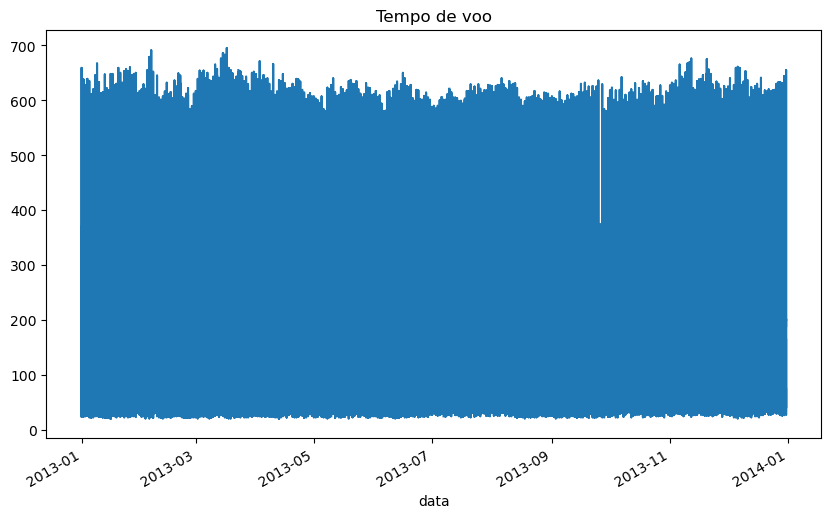

In [81]:
df_ts['air_time'].plot(figsize=(10,6),title='Tempo de voo');

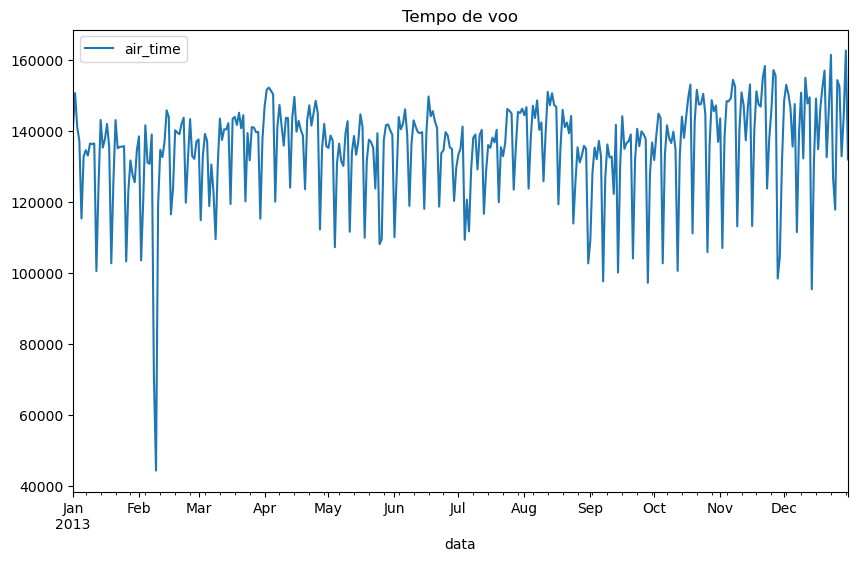

In [84]:
tmp = df.groupby("data")["air_time"].sum().reset_index()
tmp = tmp.set_index("data")
tmp.plot(figsize=(10,6),title='Tempo de voo');

In [85]:
tmp

,air_time
data,
2013-01-01,140981.0
2013-01-02,150520.0
2013-01-03,140934.0
2013-01-04,137106.0
2013-01-05,115288.0
...,...
2013-12-27,152361.0
2013-12-28,132770.0
2013-12-29,144085.0


In [87]:
tmp.resample(rule='W').mean()[:10]

,air_time
data,
2013-01-06,136258.500000
2013-01-13,128759.142857
2013-01-20,131678.285714
2013-01-27,130095.571429
2013-02-03,125867.285714
2013-02-10,110987.428571
2013-02-17,133379.571429
2013-02-24,136525.428571
2013-03-03,132895.000000


<img src="../imgs/notebooks/resample.png" style="max-width:500px; "/>